In [1]:
# Fernaldi Fauzie / 18219099

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Survey eChannel Fintech eCommerce dan eLifestyle 2020 Kelas STI_1.xlsx")

# MENGHAPUS RESPONDEN YANG MEMBUAT DUPLIKASI DATA, DATA YANG DISIMPAN MERUPAKAN DATA YANG TERBARU

In [2]:
responden = pd.DataFrame(df, columns=['Nama Responden'])
indeksResponden = responden[responden.duplicated()]
#display(indeksResponded) untuk mencari indeks data duplikasi
df = df.drop([20,43,61,96,97,102,103,137,150,155,156,168,169,172,188,222,223,224,243,253,256,265,274,280,298,305,312,313,324])

# DATA SURVEYOR

In [3]:
# Merapikan data surveyor
surveyor = pd.DataFrame(df, 
           columns=['Nama Surveyor (Mahasiswa )', 'NIM Surveyor (Mahasiswa)', 'Kelas Surveyor (Mahasiswa)', 'Unnamed: 3'])

# Melakukan drop terhadap kolom dan baris yang tidak dibutuhkan
surveyor['Kelas Surveyor (Mahasiswa)'].fillna(surveyor['Unnamed: 3'], inplace = True)
del surveyor['Unnamed: 3']
surveyor.dropna()
surveyor = surveyor.drop(0)

# Mengganti data dengan value yang lebih mudah dipahami
surveyor['Kelas Surveyor (Mahasiswa)']=surveyor['Kelas Surveyor (Mahasiswa)'].map({1: 'STI', 2: 'EL'})

# Mengganti nama kolom
surveyor.rename(columns = {surveyor.columns[0] : 'Nama'}, inplace = True)
surveyor.rename(columns = {surveyor.columns[1] : 'NIM'}, inplace = True)
surveyor.rename(columns = {surveyor.columns[2] : 'Jurusan'}, inplace = True)

# Melakukan sort untuk mencari data yang salah kemudian menghapusnya
# Data yang dihapus seperti data dengan Nama: Test, j, a, iji, dan semacamnya
# dan NIM yang bukan 18219000-18219118
surveyor.NIM = surveyor.NIM.astype(str)
surveyor = surveyor.sort_values(by=['NIM'], ascending = False)
pd.set_option('display.max_rows', None)
# display(surveyor) untuk mencari data yang salah
surveyor = surveyor.drop([225,220,22,19,244,143,163,321,261])

# Membuang duplicate dan data yang terisi salah
surveyor = surveyor.drop_duplicates(subset=['NIM'])
surveyor = surveyor.drop([94])

<AxesSubplot:ylabel='Jurusan'>

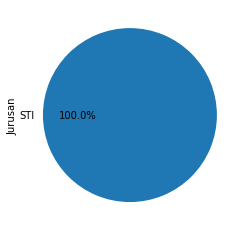

In [4]:
surveyor['Jurusan'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# Hasilnya 100% STI sehingga terbukti pembersihan data berjalan sukses
# (Karena survey ini memang khusus untuk surveyor STI K1)

# MENGHAPUS DATA YANG SUDAH PASTI TIDAK VALID

In [5]:
# Semua data yang dihapus ini sudah dicek di file excel untuk memastikan data tersebut memang "kurang baik"
# Menghapus data yang dalam 1 baris semua value-nya NaN
df = df.dropna(how='all')

# Menghapus data yang benar-benar salah
# Data yang dihapus seperti data dengan Nama Surveyor: Test, j, a, iji, dan semacamnya
# dan NIM Surveyor yang bukan 18219000-18219118, dengan pengecualian NIM yang hanya typo 1 angka tidak dihapus
df = df.drop([225,220,22,19,244,143,163,321])

# Data yang dihapus seperti data dengan Nama Responden: NaN, test, dan semacamnya
responden = pd.DataFrame(df, 
            columns=['Nama Responden'])
responden = responden.sort_values(by=['Nama Responden'], ascending = False)
# display(responden)
df = df.drop([323, 190, 285])

# DATA RESPONDEN

In [6]:
# Merapikan data jenisKelamin
jenisKelamin = pd.DataFrame(df, 
               columns=['Jenis kelamin ?', 'Unnamed: 6'])
jenisKelamin['Jenis kelamin ?'].fillna(jenisKelamin['Unnamed: 6'], inplace = True)
del jenisKelamin['Unnamed: 6']
jenisKelamin = jenisKelamin.dropna()
jenisKelamin = jenisKelamin.drop(0)
jenisKelamin['Jenis kelamin ?']=jenisKelamin['Jenis kelamin ?'].map({1: 'Laki-laki', 2: 'Perempuan'})
jenisKelamin.rename(columns = {jenisKelamin.columns[0] : 'Jenis Kelamin'}, inplace = True)
# jenisKelamin.isnull().sum() hasilnya 0
# display(jenisKelamin)

<AxesSubplot:ylabel='Jenis Kelamin'>

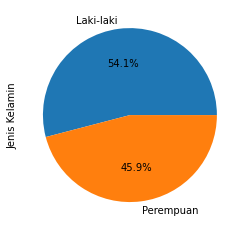

In [7]:
# Menampilkan jenis kelamin responden yang valid
jenisKelamin['Jenis Kelamin'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [8]:
usia = pd.DataFrame(df,
                   columns=['Usia ?','Unnamed: 8','Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12'])
usia['Usia ?'].fillna(usia['Unnamed: 8'], inplace = True)
usia['Usia ?'].fillna(usia['Unnamed: 9'], inplace = True)
usia['Usia ?'].fillna(usia['Unnamed: 10'], inplace = True)
usia['Usia ?'].fillna(usia['Unnamed: 11'], inplace = True)
usia['Usia ?'].fillna(usia['Unnamed: 12'], inplace = True)
del usia['Unnamed: 8'],usia['Unnamed: 9'],usia['Unnamed: 10'],usia['Unnamed: 11'],usia['Unnamed: 12']
usia = usia.dropna()
usia = usia.drop(0)
usia['Usia ?']=usia['Usia ?'].map({1: '< 15 tahun', 2: '15-20 tahun', 3:'21-30 tahun', 4:'31-40 tahun', 5:'41-50 tahun', 
                                   6:'> 50 tahun'})
usia.rename(columns = {usia.columns[0] : 'Usia'}, inplace = True)
# usia.isnull().sum() hasilnya 0
# display(usia)

<AxesSubplot:title={'center':'Usia Responden'}>

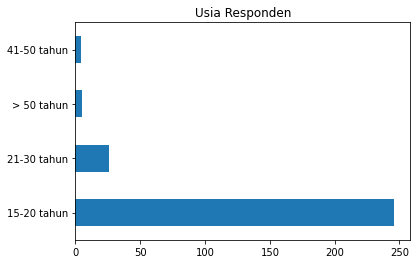

In [9]:
# Menampilkan usia responden yang valid
usia['Usia'].value_counts().plot(kind='barh', title='Usia Responden')

# PROVIDER INTERNET

In [10]:
provider = pd.DataFrame(df,
           columns=['Akses atau provider internet yang digunakan selama ini?','Unnamed: 50','Unnamed: 51','Unnamed: 52'])
provider.rename(columns = {provider.columns[0] : 'Akses/Provider Internet'}, inplace = True)
provider['Akses/Provider Internet'].fillna(provider['Unnamed: 50'], inplace = True)
provider['Akses/Provider Internet'].fillna(provider['Unnamed: 51'], inplace = True)
provider['Akses/Provider Internet'].fillna(provider['Unnamed: 52'], inplace = True)
del provider['Unnamed: 50'],provider['Unnamed: 51'],provider['Unnamed: 52']
provider = provider.dropna()
provider = provider.drop(0)
provider['Akses/Provider Internet']=provider['Akses/Provider Internet'].map({1: 'Mobile Data', 2: 'Broadband', 
                                                                             3:'Mobile Data dan Broadband'})

<AxesSubplot:ylabel='Akses/Provider Internet'>

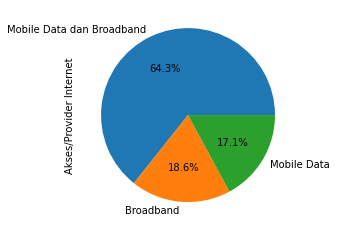

In [11]:
provider['Akses/Provider Internet'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# APLIKASI YANG BIASA DIGUNAKAN UNTUK WORK FROM HOME/SCHOOL FROM HOME

In [12]:
app = pd.DataFrame(df,
      columns=['Aplikasi apa yang biasa digunakan untuk Work From Home/ School from Home ?','Unnamed: 186','Unnamed: 187',
               'Unnamed: 188','Unnamed: 189','Unnamed: 190','Unnamed: 191'])

app.rename(columns = {app.columns[0] : 'Aplikasi Biasa Digunakan Untuk WFH/SFH'}, inplace = True)

app['Aplikasi Biasa Digunakan Untuk WFH/SFH'] = app['Aplikasi Biasa Digunakan Untuk WFH/SFH'].map({1:'Whatsapp'})
app['Unnamed: 186'] = app['Unnamed: 186'].map({2:'Zoom'})
app['Unnamed: 187'] = app['Unnamed: 187'].map({3:'Google Meet'})
app['Unnamed: 188'] = app['Unnamed: 188'].map({4:'Microsoft Team'})
app['Unnamed: 189'] = app['Unnamed: 189'].map({5:'Cisco Webex'})
app['Unnamed: 190'] = app['Unnamed: 190'].map({6:'Skype for Business'})
app['Unnamed: 191'] = app['Unnamed: 191'].map({7:'GoToMeeting'})

app['Aplikasi Biasa Digunakan Untuk WFH/SFH'] = app['Aplikasi Biasa Digunakan Untuk WFH/SFH'].replace([np.nan],' ')
app['Unnamed: 186'] = app['Unnamed: 186'].replace([np.nan],' ')
app['Unnamed: 187'] = app['Unnamed: 187'].replace([np.nan],' ')
app['Unnamed: 188'] = app['Unnamed: 188'].replace([np.nan],' ')
app['Unnamed: 189'] = app['Unnamed: 189'].replace([np.nan],' ')
app['Unnamed: 190'] = app['Unnamed: 190'].replace([np.nan],' ')
app['Unnamed: 191'] = app['Unnamed: 191'].replace([np.nan],' ')

app['Aplikasi Biasa Digunakan Untuk WFH/SFH'] = app['Aplikasi Biasa Digunakan Untuk WFH/SFH'].map(str) + ' ' + app['Unnamed: 186'].map(str) + ' ' + app['Unnamed: 187'].map(str) + ' ' +app['Unnamed: 188'].map(str) + ' ' +app['Unnamed: 189'].map(str) + ' ' +app['Unnamed: 190'].map(str) + ' ' +app['Unnamed: 191'].map(str)
del app['Unnamed: 186'], app['Unnamed: 187'], app['Unnamed: 188'], app['Unnamed: 189'], app['Unnamed: 190'], app['Unnamed: 191'] 
app = app.dropna(how='all')
app = app.drop(0)

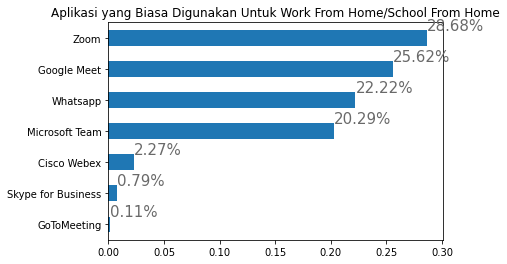

In [13]:
apph = app['Aplikasi Biasa Digunakan Untuk WFH/SFH'].str.extractall(f'({"|".join(["Whatsapp", "Zoom", "Google Meet", "Microsoft Team", "Cisco Webex", "Skype for Business", "GoToMeeting"])})')[0].value_counts('percent').plot.barh(title = 'Aplikasi yang Biasa Digunakan Untuk Work From Home/School From Home')
total1 = []
for i in apph.patches:
    total1.append(i.get_width())
    
total11 = sum(total1)

for i in apph.patches:
    apph.text(i.get_width(), i.get_y(), str(round((i.get_width()/total11)*100,2)) +'%', fontsize=15,color='dimgrey')
    
apph.invert_yaxis()

# LAYANAN BANK

In [14]:
bank = pd.DataFrame(df,
       columns=['Apakah Anda menggunakan layanan-layanan bank berikut?','Unnamed: 201','Unnamed: 202',
               'Unnamed: 203','Unnamed: 204','Unnamed: 205'])

bank.rename(columns = {bank.columns[0] : 'Bank'}, inplace = True)

bank['Bank'] = bank['Bank'].map({1:'ATM'})
bank['Unnamed: 201'] = bank['Unnamed: 201'].map({2:'Internet Banking'})
bank['Unnamed: 202'] = bank['Unnamed: 202'].map({3:'Mobile Banking'})
bank['Unnamed: 203'] = bank['Unnamed: 203'].map({4:'SMS Banking'})
bank['Unnamed: 204'] = bank['Unnamed: 204'].map({5:'Kartu Kredit'})
bank['Unnamed: 205'] = bank['Unnamed: 205'].map({6:'Datang ke Kantor Cabang'})

bank['Bank'] = bank['Bank'].replace([np.nan],' ')
bank['Unnamed: 201'] = bank['Unnamed: 201'].replace([np.nan],' ')
bank['Unnamed: 202'] = bank['Unnamed: 202'].replace([np.nan],' ')
bank['Unnamed: 203'] = bank['Unnamed: 203'].replace([np.nan],' ')
bank['Unnamed: 204'] = bank['Unnamed: 204'].replace([np.nan],' ')
bank['Unnamed: 205'] = bank['Unnamed: 205'].replace([np.nan],' ')

bank['Bank'] = bank['Bank'].map(str) + ' ' + bank['Unnamed: 201'].map(str) + ' ' + bank['Unnamed: 202'].map(str) + ' ' +bank['Unnamed: 203'].map(str) + ' ' +bank['Unnamed: 204'].map(str) + ' ' +bank['Unnamed: 205'].map(str)
del bank['Unnamed: 201'], bank['Unnamed: 202'], bank['Unnamed: 203'], bank['Unnamed: 204'], bank['Unnamed: 205'] 
bank = bank.dropna(how='all')
bank = bank.drop(0)

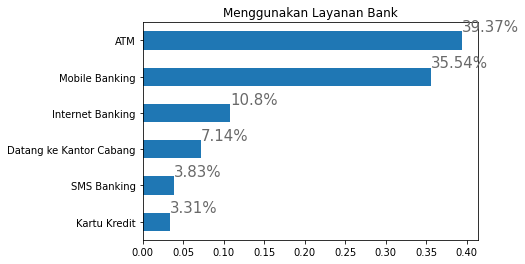

In [15]:
bankh = bank['Bank'].str.extractall(f'({"|".join(["ATM", "Internet Banking", "Mobile Banking", "SMS Banking","Kartu Kredit", "Datang ke Kantor Cabang"])})')[0].value_counts('percent').plot.barh(title = 'Menggunakan Layanan Bank')
total2 = []
for i in bankh.patches:
    total2.append(i.get_width())
    
total22 = sum(total2)

for i in bankh.patches:
    bankh.text(i.get_width(), i.get_y(), str(round((i.get_width()/total22)*100,2)) +'%', fontsize=15,color='dimgrey')
    
bankh.invert_yaxis()

# E-MONEY

In [16]:
emoney = pd.DataFrame(df,
         columns=['Apakah Anda menggunakan eMoney berikut? (jawaban boleh lebih dari 1)','Unnamed: 349','Unnamed: 350',
                  'Unnamed: 351','Unnamed: 352','Unnamed: 353','Unnamed: 354','Unnamed: 355','Unnamed: 356','Unnamed: 357',
                  'Unnamed: 358','Unnamed: 359'])

emoney.rename(columns = {emoney.columns[0] : 'eMoney'}, inplace = True)

emoney['eMoney'] = emoney['eMoney'].map({1:'Tidak Menggunakan eMoney'})
emoney['Unnamed: 349'] = emoney['Unnamed: 349'].map({2:'GoPay'})
emoney['Unnamed: 350'] = emoney['Unnamed: 350'].map({3:'OVO'})
emoney['Unnamed: 351'] = emoney['Unnamed: 351'].map({4:'LinkAja'})
emoney['Unnamed: 352'] = emoney['Unnamed: 352'].map({5:'Dana'})
emoney['Unnamed: 353'] = emoney['Unnamed: 353'].map({6:'Paytren'})
emoney['Unnamed: 354'] = emoney['Unnamed: 354'].map({7:'ShopeePay'})
emoney['Unnamed: 355'] = emoney['Unnamed: 355'].map({8:'Flazz BCA'})
emoney['Unnamed: 356'] = emoney['Unnamed: 356'].map({9:'Brizzi'})
emoney['Unnamed: 357'] = emoney['Unnamed: 357'].map({10:'eMoney Mandiri'})
emoney['Unnamed: 358'] = emoney['Unnamed: 358'].map({11:'JakCard'})
emoney['Unnamed: 359'] = emoney['Unnamed: 359'].map({12:'iSaku'})

emoney['eMoney'] = emoney['eMoney'].replace([np.nan],' ')
emoney['Unnamed: 349'] = emoney['Unnamed: 349'].replace([np.nan],' ')
emoney['Unnamed: 350'] = emoney['Unnamed: 350'].replace([np.nan],' ')
emoney['Unnamed: 351'] = emoney['Unnamed: 351'].replace([np.nan],' ')
emoney['Unnamed: 352'] = emoney['Unnamed: 352'].replace([np.nan],' ')
emoney['Unnamed: 353'] = emoney['Unnamed: 353'].replace([np.nan],' ')
emoney['Unnamed: 354'] = emoney['Unnamed: 354'].replace([np.nan],' ')
emoney['Unnamed: 355'] = emoney['Unnamed: 355'].replace([np.nan],' ')
emoney['Unnamed: 356'] = emoney['Unnamed: 356'].replace([np.nan],' ')
emoney['Unnamed: 357'] = emoney['Unnamed: 357'].replace([np.nan],' ')
emoney['Unnamed: 358'] = emoney['Unnamed: 358'].replace([np.nan],' ')
emoney['Unnamed: 359'] = emoney['Unnamed: 359'].replace([np.nan],' ')

emoney['eMoney'] = emoney['eMoney'].map(str) + ' ' + emoney['Unnamed: 349'].map(str) + ' ' + emoney['Unnamed: 350'].map(str) + ' ' + emoney['Unnamed: 351'].map(str) + ' ' + emoney['Unnamed: 352'].map(str) + ' ' + emoney['Unnamed: 353'].map(str) + ' ' + emoney['Unnamed: 354'].map(str) + ' ' + emoney['Unnamed: 355'].map(str) + ' ' + emoney['Unnamed: 356'].map(str) + ' ' + emoney['Unnamed: 357'].map(str) + ' ' + emoney['Unnamed: 358'].map(str) + ' ' + emoney['Unnamed: 359'].map(str)
del emoney['Unnamed: 349'], emoney['Unnamed: 350'], emoney['Unnamed: 351'], emoney['Unnamed: 352'], emoney['Unnamed: 353'], emoney['Unnamed: 354'], emoney['Unnamed: 355'], emoney['Unnamed: 356'], emoney['Unnamed: 357'], emoney['Unnamed: 358'], emoney['Unnamed: 359']
emoney = emoney.dropna(how='all')
emoney = emoney.drop(0)
#emoney.head

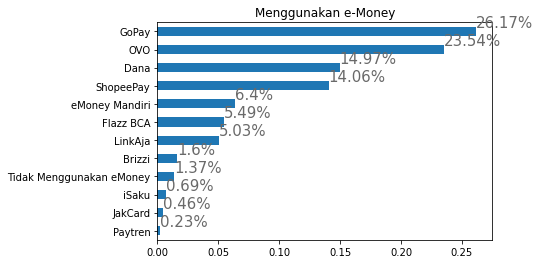

In [17]:
emoneyh = emoney['eMoney'].str.extractall(f'({"|".join(["Tidak Menggunakan eMoney", "GoPay", "OVO", "LinkAja","Dana", "Paytren", "ShopeePay", "Flazz BCA", "Brizzi", "eMoney Mandiri", "JakCard", "iSaku"])})')[0].value_counts('percent').plot.barh(title = 'Menggunakan e-Money')
total3 = []
for i in emoneyh.patches:
    total3.append(i.get_width())
    
total33 = sum(total3)

for i in emoneyh.patches:
    emoneyh.text(i.get_width(), i.get_y(), str(round((i.get_width()/total33)*100,2)) +'%', fontsize=15,color='dimgrey')
    
emoneyh.invert_yaxis()

# TOKO ONLINE FAVORIT

In [18]:
toko = pd.DataFrame(df,
       columns=['Mohon sebutkan 3 toko online favorit, dimana dalam 3 bulan terakhir anda melakukan belanja online?',
                'Unnamed: 472','Unnamed: 473', 'Unnamed: 474','Unnamed: 475','Unnamed: 476','Unnamed: 477','Unnamed: 478',
                'Unnamed: 479', 'Unnamed: 480'])

toko.rename(columns = {toko.columns[0] : 'Toko Online'}, inplace = True)

toko['Toko Online'] = toko['Toko Online'].map({1:'Tokopedia'})
toko['Unnamed: 472'] = toko['Unnamed: 472'].map({2:'Shopee'})
toko['Unnamed: 473'] = toko['Unnamed: 473'].map({3:'Bukalapak'})
toko['Unnamed: 474'] = toko['Unnamed: 474'].map({4:'Lazada'})
toko['Unnamed: 475'] = toko['Unnamed: 475'].map({5:'JD.id'})
toko['Unnamed: 476'] = toko['Unnamed: 476'].map({6:'Blibli'})
toko['Unnamed: 477'] = toko['Unnamed: 477'].map({7:'Gojek (GoFood, GoShop, dll)'})
toko['Unnamed: 478'] = toko['Unnamed: 478'].map({8:'Grab (GrabFood, Grabmart, dll)'})
toko['Unnamed: 479'] = toko['Unnamed: 479'].map({9:'Traveloka'})
toko['Unnamed: 480'] = toko['Unnamed: 480'].map({10:'Tiket.com'})

toko['Toko Online'] = toko['Toko Online'].replace([np.nan],' ')
toko['Unnamed: 472'] = toko['Unnamed: 472'].replace([np.nan],' ')
toko['Unnamed: 473'] = toko['Unnamed: 473'].replace([np.nan],' ')
toko['Unnamed: 474'] = toko['Unnamed: 474'].replace([np.nan],' ')
toko['Unnamed: 475'] = toko['Unnamed: 475'].replace([np.nan],' ')
toko['Unnamed: 476'] = toko['Unnamed: 476'].replace([np.nan],' ')
toko['Unnamed: 477'] = toko['Unnamed: 477'].replace([np.nan],' ')
toko['Unnamed: 478'] = toko['Unnamed: 478'].replace([np.nan],' ')
toko['Unnamed: 479'] = toko['Unnamed: 479'].replace([np.nan],' ')
toko['Unnamed: 480'] = toko['Unnamed: 480'].replace([np.nan],' ')

toko['Toko Online'] = toko['Toko Online'].map(str)+' '+toko['Unnamed: 472'].map(str)+' '+toko['Unnamed: 473'].map(str)+' '+toko['Unnamed: 474'].map(str)+' '+toko['Unnamed: 475'].map(str)+' '+toko['Unnamed: 476'].map(str)+' '+toko['Unnamed: 477'].map(str)+' '+toko['Unnamed: 478'].map(str)+' '+toko['Unnamed: 479'].map(str)+' '+toko['Unnamed: 480'].map(str)
del toko['Unnamed: 472'],toko['Unnamed: 473'],toko['Unnamed: 474'],toko['Unnamed: 475'],toko['Unnamed: 476'],toko['Unnamed: 477'],toko['Unnamed: 478'],toko['Unnamed: 479'],toko['Unnamed: 480']
toko = toko.dropna(how='all')
toko = toko.drop(0)
# toko.head()

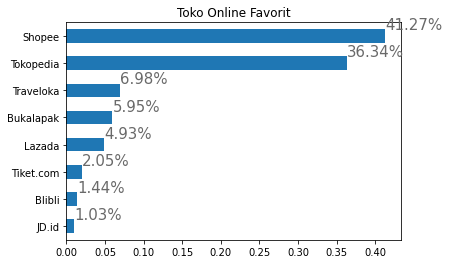

In [19]:
tokoh = toko['Toko Online'].str.extractall(f'({"|".join(["Tokopedia", "Shopee", "Bukalapak", "Lazada","JD.id", "Blibli", "Gojek (GoFood, GoShop, dll)", "Grab (GrabFood, Grabmart, dll)", "Traveloka", "Tiket.com"])})')[0].value_counts('percent').plot.barh(title = 'Toko Online Favorit')
total4 = []
for i in tokoh.patches:
    total4.append(i.get_width())
    
total44 = sum(total4)

for i in tokoh.patches:
    tokoh.text(i.get_width(), i.get_y(), str(round((i.get_width()/total44)*100,2)) +'%', fontsize=15,color='dimgrey')
    
tokoh.invert_yaxis()

# FINTECH

In [20]:
fintech = pd.DataFrame(df,
          columns=['Apakah Anda pernah meng﻿gunakan fintech untuk investasi berikut?','Unnamed: 602','Unnamed: 603',
                   'Unnamed: 604'])

fintech.rename(columns = {fintech.columns[0] : 'Fintech'}, inplace = True)

fintech['Fintech'] = fintech['Fintech'].map({1:'Tidak pernah menggunakan'})
fintech['Unnamed: 602'] = fintech['Unnamed: 602'].map({2:'Bareksa'})
fintech['Unnamed: 603'] = fintech['Unnamed: 603'].map({3:'Bibitnomic'})
fintech['Unnamed: 604'] = fintech['Unnamed: 604'].map({4:'LiveOlive'})

fintech['Fintech'] = fintech['Fintech'].replace([np.nan],' ')
fintech['Unnamed: 602'] = fintech['Unnamed: 602'].replace([np.nan],' ')
fintech['Unnamed: 603'] = fintech['Unnamed: 603'].replace([np.nan],' ')
fintech['Unnamed: 604'] = fintech['Unnamed: 604'].replace([np.nan],' ')

fintech['Fintech'] = fintech['Fintech'].map(str)+' '+fintech['Unnamed: 602'].map(str)+' '+fintech['Unnamed: 603'].map(str)+' '+fintech['Unnamed: 604'].map(str)
del fintech['Unnamed: 602'],fintech['Unnamed: 603'],fintech['Unnamed: 604']
fintech = fintech.dropna(how='all')
fintech = fintech.drop(0)

<AxesSubplot:title={'center':'Menggunakan Fintech'}, ylabel='0'>

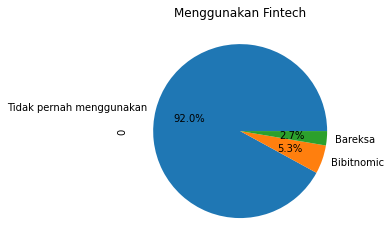

In [21]:
fintech['Fintech'].str.extractall(f'({"|".join(["Tidak pernah menggunakan", "Bareksa", "Bibitnomic", "LiveOlive"])})')[0].value_counts('percent').plot.pie(title = 'Menggunakan Fintech',autopct='%1.1f%%')